# Grid Search CV and RandomSearch CV

In [1]:
from time import time

import numpy as np
import scipy.stats as stats

from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Load data and the classfier

In [2]:

# get some data
X, y = load_digits(return_X_y=True, n_class=3)

# build a classifier
clf = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)



In [3]:

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")



## Random Search CV

In [4]:

# specify parameters and distributions to sample from
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": stats.loguniform(1e-2, 1e0),
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)


In [5]:

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)


RandomizedSearchCV took 0.41 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.991 (std: 0.006)
Parameters: {'alpha': 0.0118159489787735, 'average': False, 'l1_ratio': 0.3051814535148506}

Model with rank: 2
Mean validation score: 0.991 (std: 0.010)
Parameters: {'alpha': 0.021932927578789865, 'average': False, 'l1_ratio': 0.5575760371264266}

Model with rank: 3
Mean validation score: 0.987 (std: 0.017)
Parameters: {'alpha': 0.050217050375809404, 'average': False, 'l1_ratio': 0.6314054624469156}



## Grid Search CV

In [6]:

# use a full grid over all parameters
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)


In [7]:

start = time()
grid_search.fit(X, y)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

GridSearchCV took 2.55 seconds for 60 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.991 (std: 0.008)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.3333333333333333}

Model with rank: 2
Mean validation score: 0.989 (std: 0.018)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.7777777777777777}

Model with rank: 3
Mean validation score: 0.989 (std: 0.018)
Parameters: {'alpha': 0.1, 'average': False, 'l1_ratio': 0.8888888888888888}



In [18]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_average', 'param_l1_ratio', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

## Parallel Coordinate Plots

In [29]:
ddf = pd.DataFrame.from_dict(grid_search.cv_results_)[['param_alpha', 'param_average', 'param_l1_ratio', 'mean_test_score']]

In [25]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

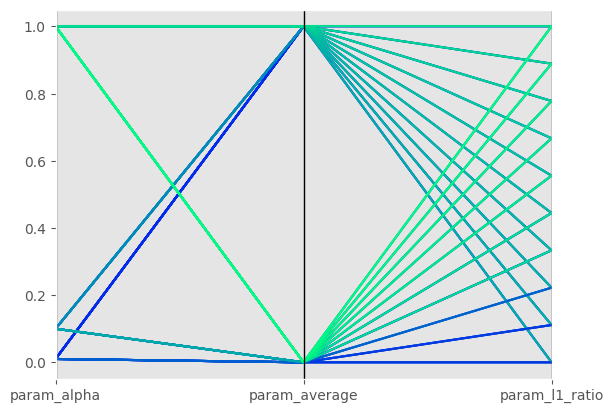

In [32]:
parallel_coordinates(ddf, 'mean_test_score', colormap=plt.get_cmap("winter"))
plt.legend().set_visible(False)